## Importing necessary libraries and reading the csv file

In [26]:
import pandas as pd
import matplotlib as mat
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('Corona Data.csv')


In [27]:
df.head()#Displaying the first five values

,Country,Total Cases,Total Deaths,Total Recovered,Death Rate,Recovery Rate,Death Rate Tot,Recovery Rate Tot,Avg. Temp Feb 2020
0,Singapore,106.0,NaN,74.0,NaN,100.0,NaN,70.0,28.0
1,Malaysia,29.0,NaN,22.0,NaN,100.0,NaN,76.0,27.0
2,Germany,130.0,NaN,16.0,NaN,100.0,NaN,12.0,0.0
3,Vietnam,16.0,NaN,16.0,NaN,100.0,NaN,100.0,15.0
4,U.K.,36.0,NaN,8.0,NaN,100.0,NaN,22.0,4.0


## Renaming columns 

In [28]:
df=df.rename({'Total Cases':'Tot_Cases','Total Deaths':'Tot_Deaths','Total Recovered':'Tot_Rec','Death Rate':'Death_Rate','Recovery Rate':'Rec_rate','Death Rate Tot':'Death_Rate_T','Recovery Rate Tot':'Rec_Rate_T','Avg. Temp Feb 2020':'Avg_Temp'},axis='columns')
df.head()

,Country,Tot_Cases,Tot_Deaths,Tot_Rec,Death_Rate,Rec_rate,Death_Rate_T,Rec_Rate_T,Avg_Temp
0,Singapore,106.0,NaN,74.0,NaN,100.0,NaN,70.0,28.0
1,Malaysia,29.0,NaN,22.0,NaN,100.0,NaN,76.0,27.0
2,Germany,130.0,NaN,16.0,NaN,100.0,NaN,12.0,0.0
3,Vietnam,16.0,NaN,16.0,NaN,100.0,NaN,100.0,15.0
4,U.K.,36.0,NaN,8.0,NaN,100.0,NaN,22.0,4.0


## Finding out the number of missing values

In [29]:
df.isna().sum()

Country          0
Tot_Cases        0
Tot_Deaths      55
Tot_Rec         35
Death_Rate      55
Rec_rate        35
Death_Rate_T    55
Rec_Rate_T      35
Avg_Temp         0
dtype: int64

## Sorting Total cases in ascending order

In [30]:
df.sort_values(by=['Tot_Cases'], axis = 0, ascending = True, inplace = True)
df.head()

,Country,Tot_Cases,Tot_Deaths,Tot_Rec,Death_Rate,Rec_rate,Death_Rate_T,Rec_Rate_T,Avg_Temp
68,Nigeria,1.0,NaN,NaN,NaN,NaN,NaN,NaN,26.0
67,New Zealand,1.0,NaN,NaN,NaN,NaN,NaN,NaN,18.0
57,Afghanistan,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
58,Armenia,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
59,Belarus,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-4.0


## Replacing missing values Total Recovery
###### Total recovered is an essential column that has quite a few missing values. In this case we assume all those affected by the virus have not recovered

In [31]:
df['Tot_Rec'].fillna(0,inplace=True)
df.head()

,Country,Tot_Cases,Tot_Deaths,Tot_Rec,Death_Rate,Rec_rate,Death_Rate_T,Rec_Rate_T,Avg_Temp
68,Nigeria,1.0,NaN,0.0,NaN,NaN,NaN,NaN,26.0
67,New Zealand,1.0,NaN,0.0,NaN,NaN,NaN,NaN,18.0
57,Afghanistan,1.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0
58,Armenia,1.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0
59,Belarus,1.0,NaN,0.0,NaN,NaN,NaN,NaN,-4.0


## Replacing missing values in Total Deaths
###### This is another essential column.We assume that the values in the not recovered area of the survey have been added to the Total Deaths column.

In [32]:
df['Tot_Deaths'].fillna(df['Tot_Cases']-df['Tot_Rec'],inplace=True)
df.tail()

,Country,Tot_Cases,Tot_Deaths,Tot_Rec,Death_Rate,Rec_rate,Death_Rate_T,Rec_Rate_T,Avg_Temp
32,Diamond Princess,705.0,7.0,10.0,41.0,59.0,1.0,1.0,5.0
29,Iran,978.0,54.0,175.0,24.0,76.0,6.0,18.0,1.0
30,Italy,1694.0,34.0,83.0,29.0,71.0,2.0,5.0,5.0
33,S. Korea,4212.0,26.0,30.0,46.0,54.0,1.0,1.0,-2.0
23,China,80026.0,2912.0,44539.0,6.0,94.0,4.0,56.0,5.0


## Pie chart to show the distribution of the virus across the countries

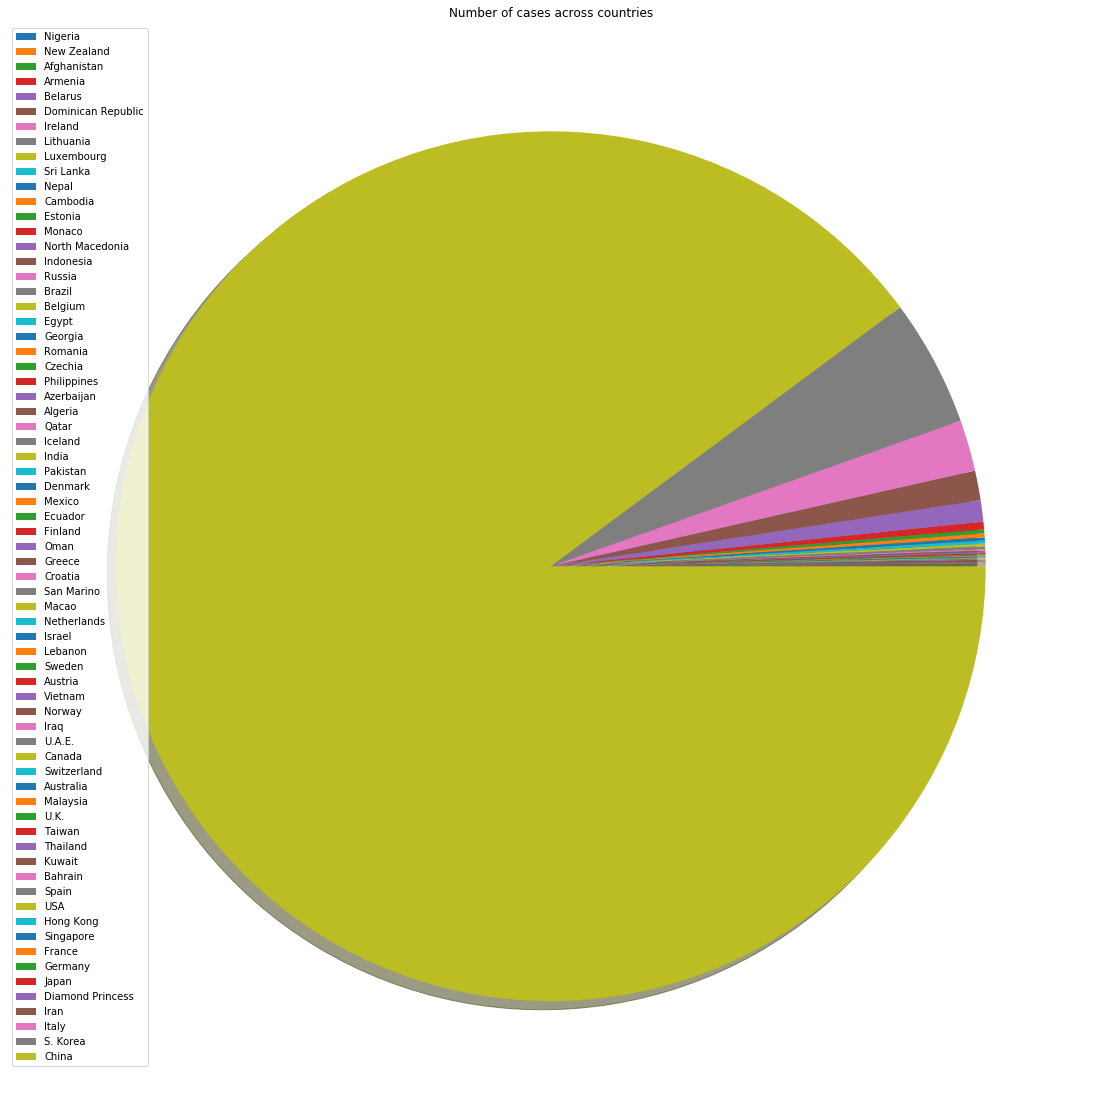

In [33]:
labels=df['Country'].tolist()
sizes=df['Tot_Cases'].tolist()
ax=plt.subplots(figsize=(20,20))
plt.pie(sizes,shadow=True)
plt.legend(labels,loc="best")
plt.axis(figsize=ax)
plt.title('Number of cases across countries')
plt.show()

Text(0.5, 1.0, 'Country v/s Total Deaths')

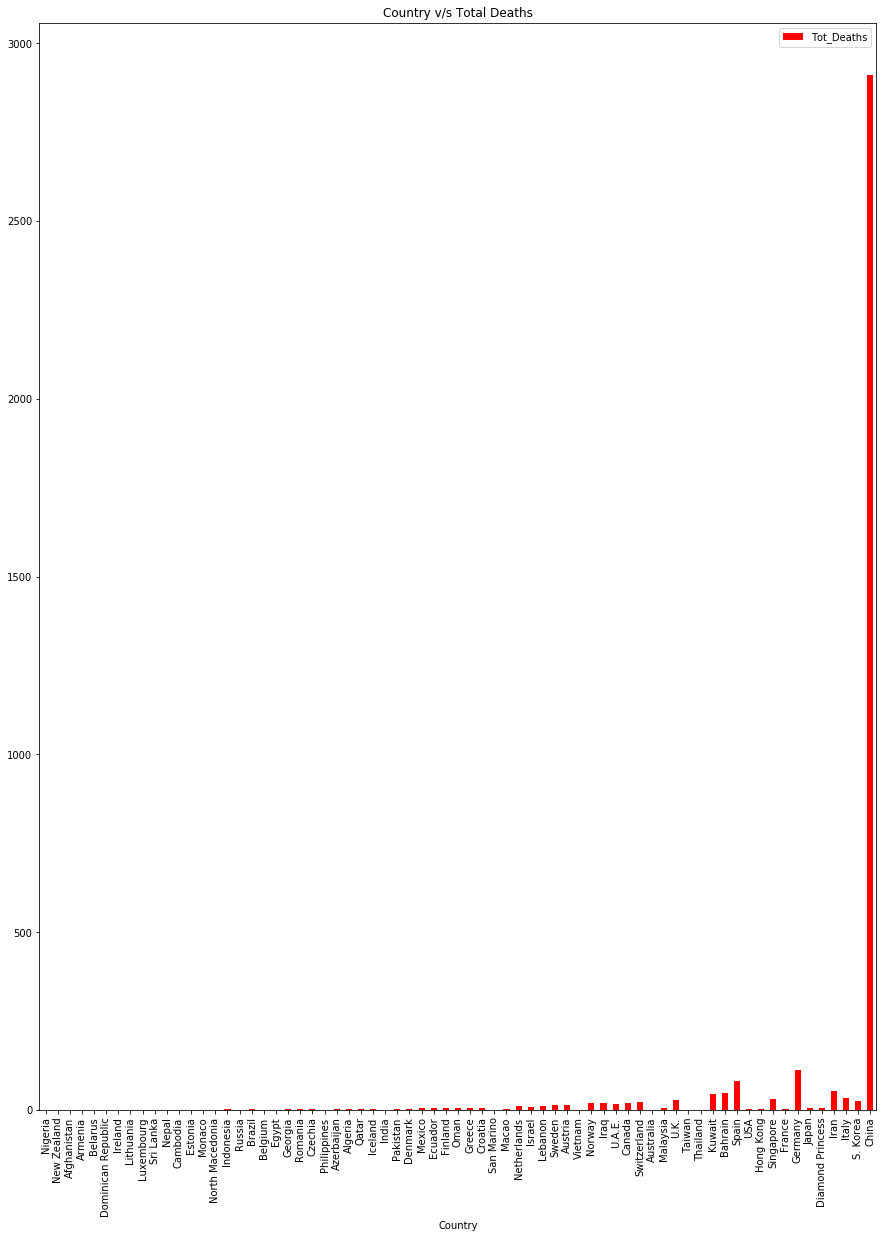

In [34]:
df.plot(x='Country',y='Tot_Deaths',kind='bar',figsize=(15,20),color='r')
plt.title('Country v/s Total Deaths')


###### China has the highest number of deaths

Text(0.5, 1.0, 'Country v/s Total cases')

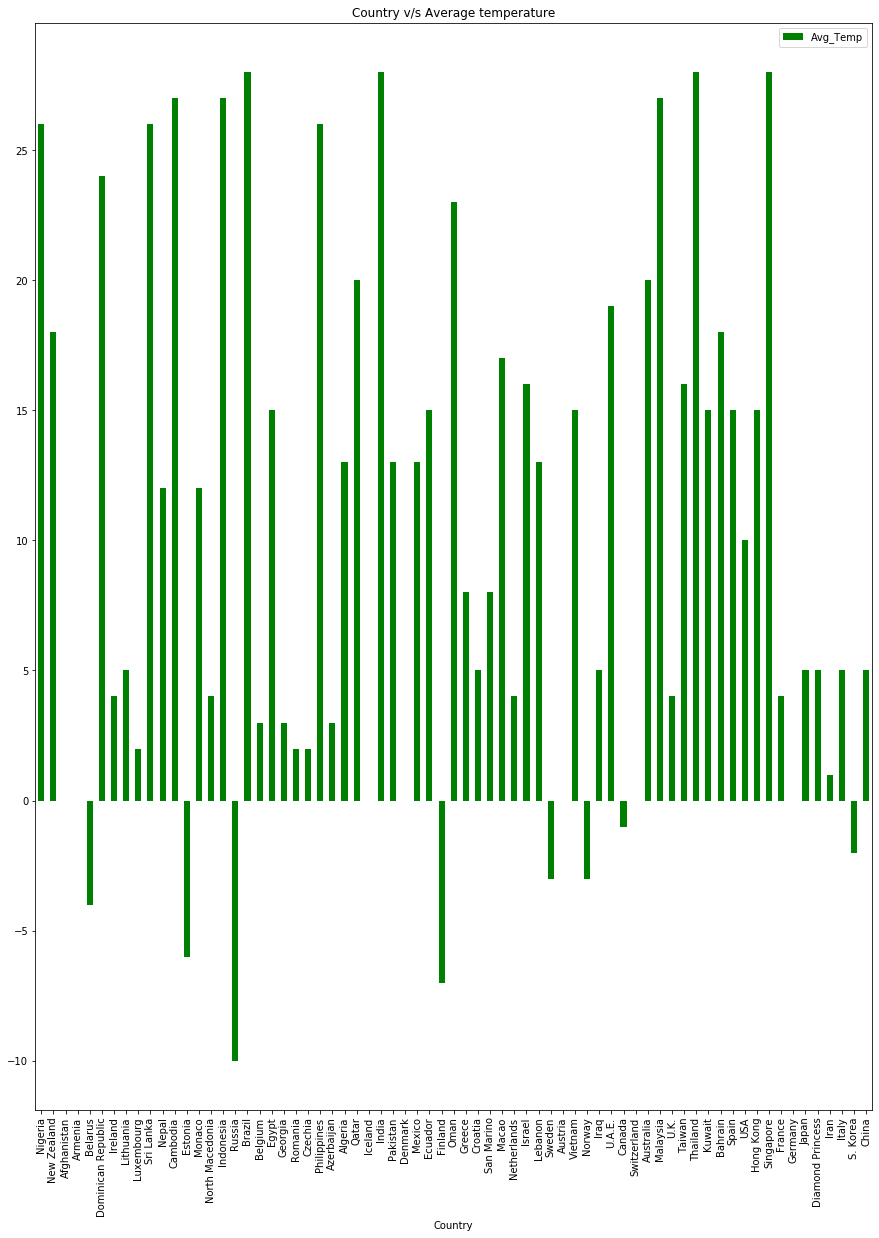

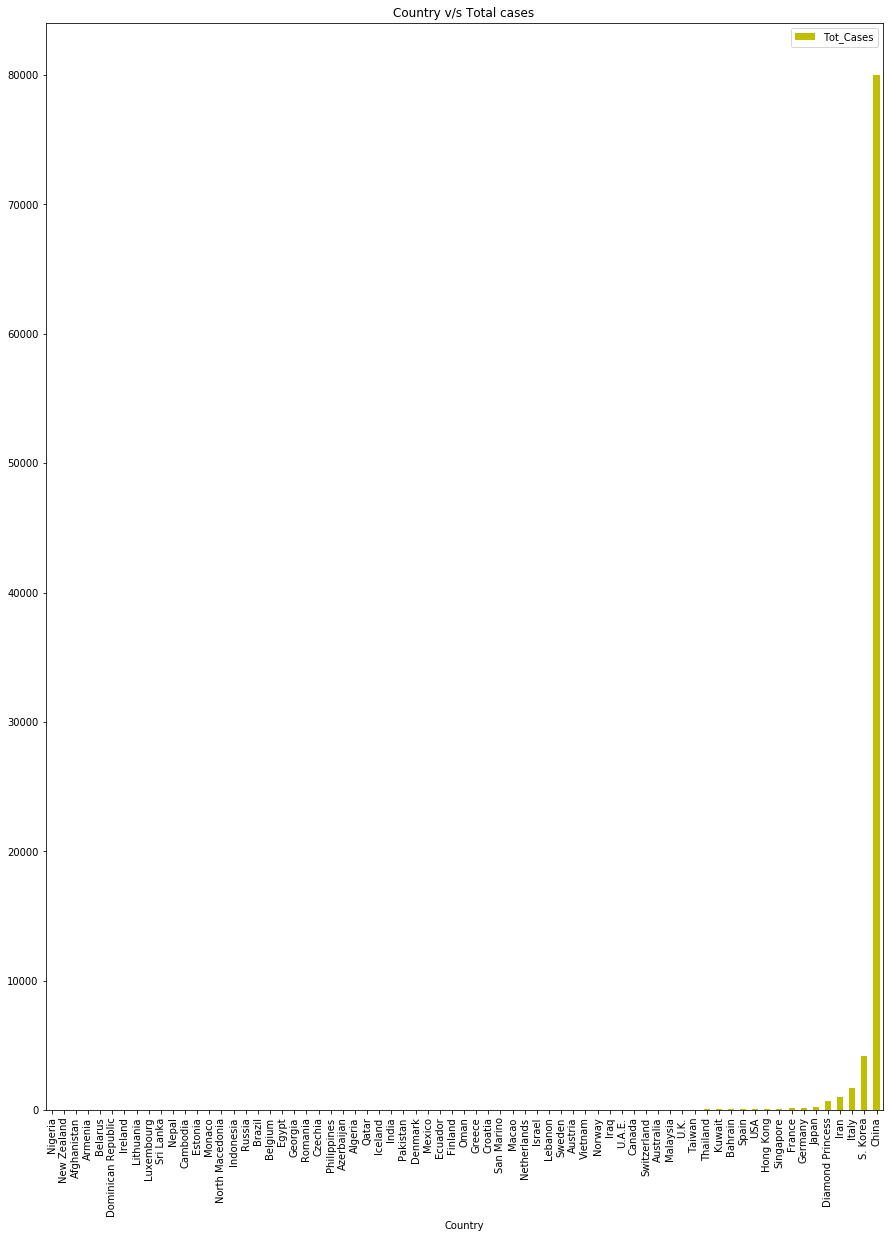

In [35]:
df.plot(x='Country',y='Avg_Temp',kind='bar',figsize=(15,20),color='g')
plt.title('Country v/s Average temperature')
df.plot(x='Country',y='Tot_Cases',kind='bar',figsize=(15,20),color='y')
plt.title('Country v/s Total cases')

###### From the two graphs above we infer that higher the temperature in a particular country,lesser the total number of cases

## Filling in Death rate, Recovery rate and their total values

In [36]:
df['Death_Rate'].fillna((df['Tot_Deaths']/(df['Tot_Deaths']+df['Tot_Rec'])),inplace=True)
df.tail()

,Country,Tot_Cases,Tot_Deaths,Tot_Rec,Death_Rate,Rec_rate,Death_Rate_T,Rec_Rate_T,Avg_Temp
32,Diamond Princess,705.0,7.0,10.0,41.0,59.0,1.0,1.0,5.0
29,Iran,978.0,54.0,175.0,24.0,76.0,6.0,18.0,1.0
30,Italy,1694.0,34.0,83.0,29.0,71.0,2.0,5.0,5.0
33,S. Korea,4212.0,26.0,30.0,46.0,54.0,1.0,1.0,-2.0
23,China,80026.0,2912.0,44539.0,6.0,94.0,4.0,56.0,5.0


In [37]:
df['Rec_rate'].fillna((df['Tot_Rec']/(df['Tot_Deaths']+df['Tot_Rec'])),inplace=True)
df.tail()

,Country,Tot_Cases,Tot_Deaths,Tot_Rec,Death_Rate,Rec_rate,Death_Rate_T,Rec_Rate_T,Avg_Temp
32,Diamond Princess,705.0,7.0,10.0,41.0,59.0,1.0,1.0,5.0
29,Iran,978.0,54.0,175.0,24.0,76.0,6.0,18.0,1.0
30,Italy,1694.0,34.0,83.0,29.0,71.0,2.0,5.0,5.0
33,S. Korea,4212.0,26.0,30.0,46.0,54.0,1.0,1.0,-2.0
23,China,80026.0,2912.0,44539.0,6.0,94.0,4.0,56.0,5.0


In [38]:
df['Death_Rate_T'].fillna((df['Tot_Deaths']/df['Tot_Cases']),inplace=True)
df.tail()

,Country,Tot_Cases,Tot_Deaths,Tot_Rec,Death_Rate,Rec_rate,Death_Rate_T,Rec_Rate_T,Avg_Temp
32,Diamond Princess,705.0,7.0,10.0,41.0,59.0,1.0,1.0,5.0
29,Iran,978.0,54.0,175.0,24.0,76.0,6.0,18.0,1.0
30,Italy,1694.0,34.0,83.0,29.0,71.0,2.0,5.0,5.0
33,S. Korea,4212.0,26.0,30.0,46.0,54.0,1.0,1.0,-2.0
23,China,80026.0,2912.0,44539.0,6.0,94.0,4.0,56.0,5.0


In [39]:
df['Rec_Rate_T'].fillna((df['Tot_Rec']/df['Tot_Cases']),inplace=True)
df.tail()

,Country,Tot_Cases,Tot_Deaths,Tot_Rec,Death_Rate,Rec_rate,Death_Rate_T,Rec_Rate_T,Avg_Temp
32,Diamond Princess,705.0,7.0,10.0,41.0,59.0,1.0,1.0,5.0
29,Iran,978.0,54.0,175.0,24.0,76.0,6.0,18.0,1.0
30,Italy,1694.0,34.0,83.0,29.0,71.0,2.0,5.0,5.0
33,S. Korea,4212.0,26.0,30.0,46.0,54.0,1.0,1.0,-2.0
23,China,80026.0,2912.0,44539.0,6.0,94.0,4.0,56.0,5.0


## Plots using death and recovery rates

Text(0.5, 1.0, 'Country v/s Death Rate')

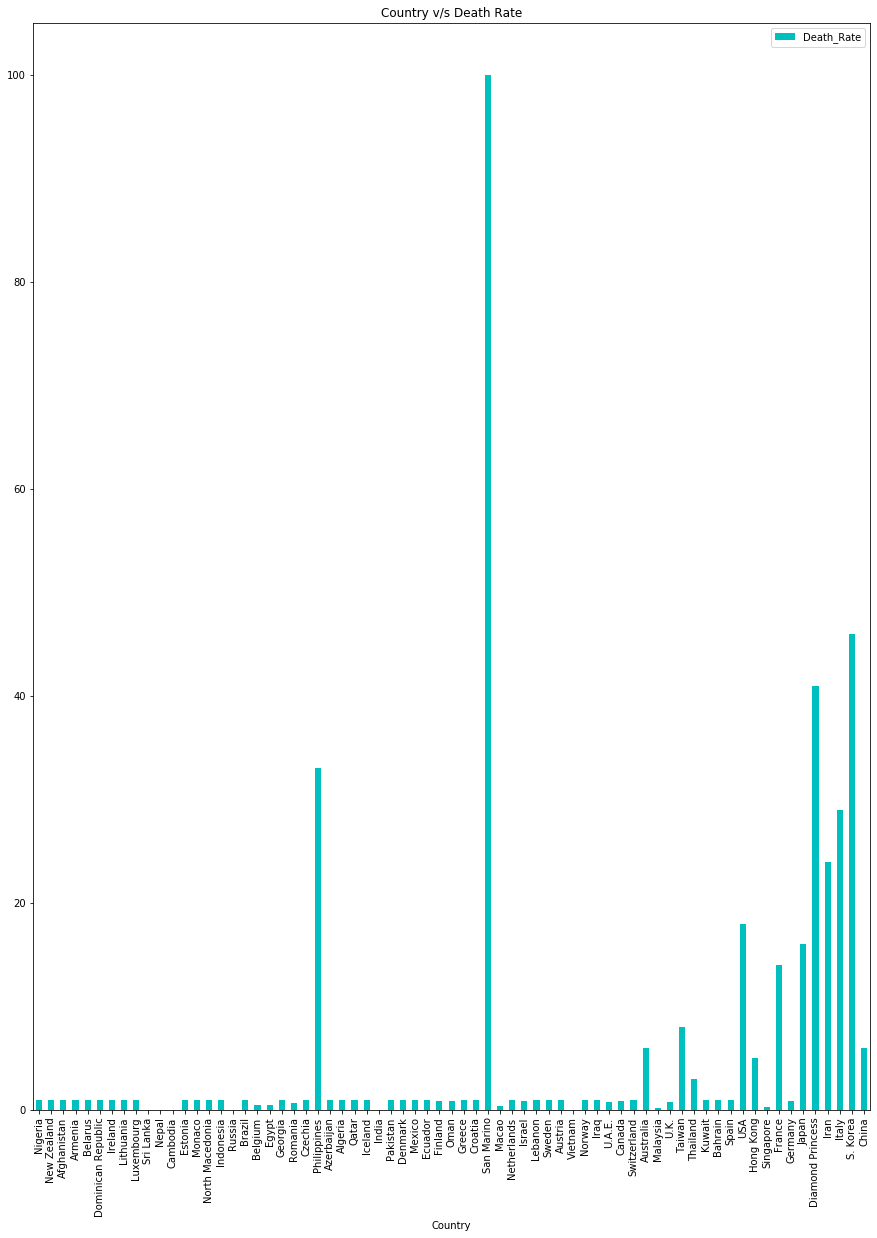

In [40]:
df.plot(x='Country',y='Death_Rate',kind='bar',figsize=(15,20),color='c')
plt.title('Country v/s Death Rate')

###### We see that San-Marino has the highest death rate even though it does not have the highest number of cases.San-Marino lies in central Italy and has an average temperature of 8-10 degree celcius. Thus it can be inferred that the climatic conditions of Italy allows the maximum spread and fatality of the virus.

Text(0.5, 1.0, 'Death And Recovery Rate v/s Average Temperature')

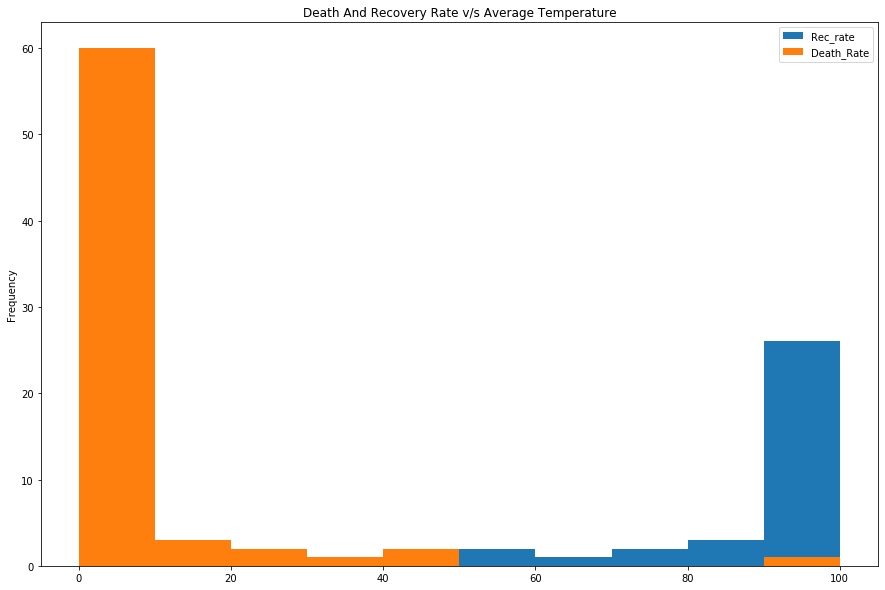

In [41]:
df.plot(y=['Rec_rate','Death_Rate'],x='Avg_Temp',kind='hist',figsize=(15,10))
plt.title('Death And Recovery Rate v/s Average Temperature')

Text(0.5, 1.0, 'Country v/s Average temperature')

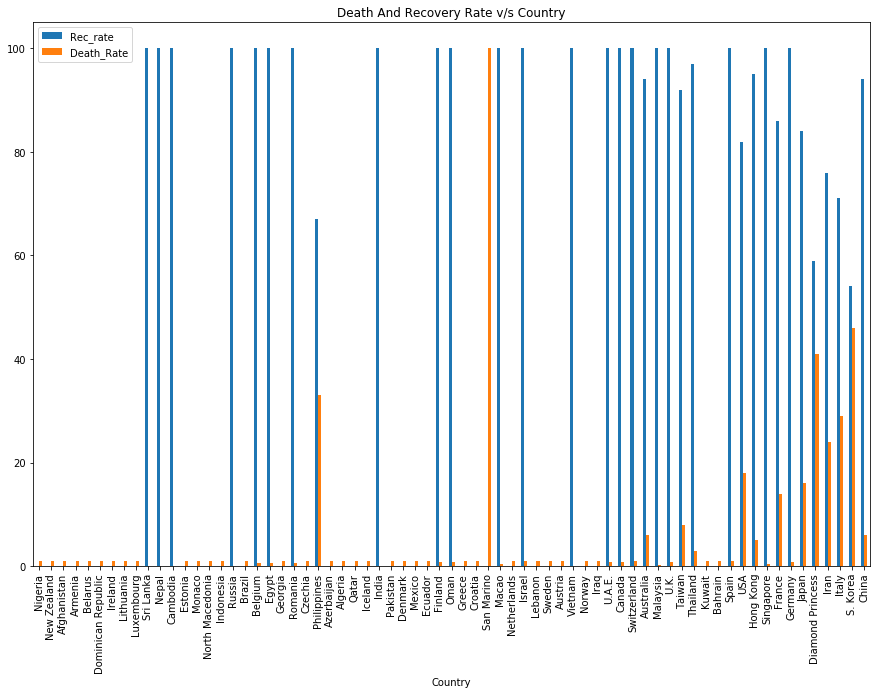

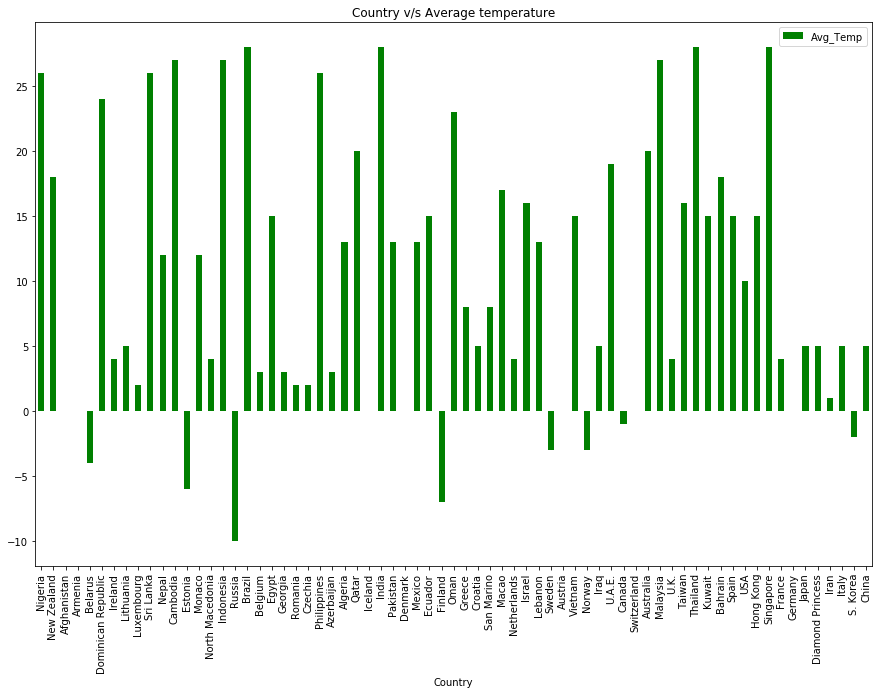

In [42]:
df.plot(y=['Rec_rate','Death_Rate'],x='Country',kind='bar',figsize=(15,10))
plt.title('Death And Recovery Rate v/s Country')
df.plot(y='Avg_Temp',x='Country',kind='bar',figsize=(15,10),color='g')#For easy comparison
plt.title('Country v/s Average temperature')

Text(0.5, 1.0, 'Comparing the Total Death rate and the Total Recovery Rate')

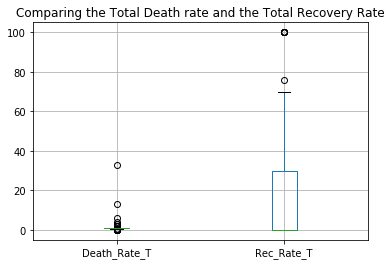

In [43]:
df.boxplot(column=['Death_Rate_T','Rec_Rate_T'])
plt.title('Comparing the Total Death rate and the Total Recovery Rate')

Text(0.5, 1, 'Average Temperature v/s Total Recovery Rate')

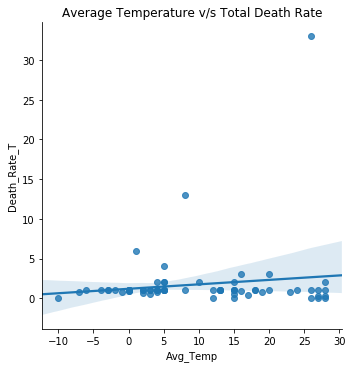

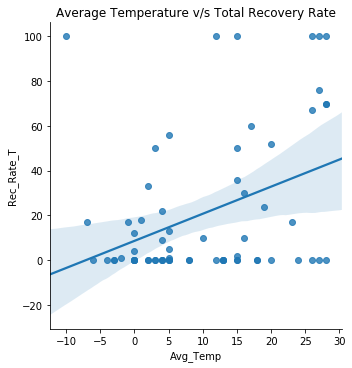

In [44]:
sns.lmplot(x='Avg_Temp',y='Death_Rate_T',data=df)
plt.title('Average Temperature v/s Total Death Rate')
sns.lmplot(x='Avg_Temp',y='Rec_Rate_T',data=df)
plt.title('Average Temperature v/s Total Recovery Rate')

###### The regression line depicts the Death rate increasing by a minimum amount with the increase in the temperature whereas the recovery rate increases significantly with the increase in the temperature.

Text(0.5, 1.0, 'Average temperature v/s Total Recovery rate')

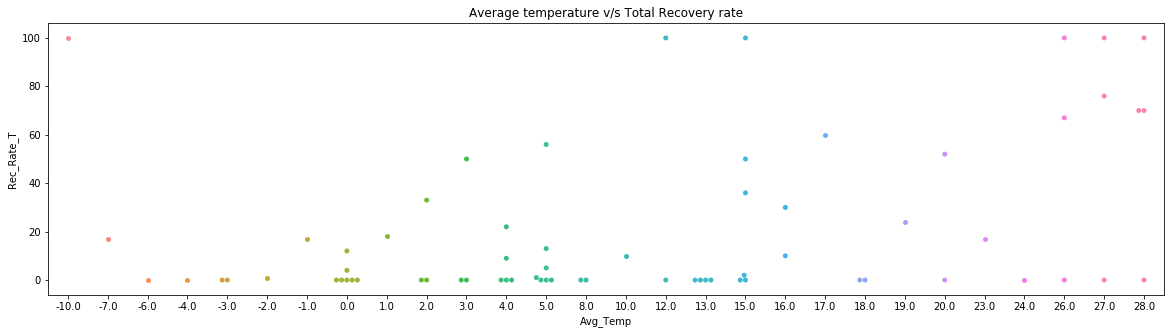

In [45]:
plt.figure(figsize=(20,5))
sns.swarmplot(x='Avg_Temp',y='Rec_Rate_T',data=df)
plt.title('Average temperature v/s Total Recovery rate')

###### From the above graphs, we note that greater the temperature in a country,lesser the death rate and greater the recovery rate. And thus, the Recovery Rate is directly proportional to the Average Temperature.

### In conclusion it can be said that higher the temperatures,lesser the number of cases of corona virus and greater the recovery rate. Thus,summers could bring hope of eradicating this virus completely!!